<a href="https://colab.research.google.com/github/Malhar-Girgaonkar/Art_classifier_mini/blob/main/Art_classifier_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import modules

import shutil
import os
import zipfile
import random
import shutil
import warnings

In [1]:
#mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/dataset/OG_dataset'
base_dir = '/content/drive/MyDrive/dataset/dataset_updated'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'training_set')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation_set')
os.mkdir(validation_dir)

#Under train folder create 5 folders
# ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']

train_drawings_dir = os.path.join(train_dir, 'drawings')
os.mkdir(train_drawings_dir)

train_engraving_dir = os.path.join(train_dir, 'engraving')
os.mkdir(train_engraving_dir)

train_iconography_dir = os.path.join(train_dir, 'iconography')
os.mkdir(train_iconography_dir)

train_painting_dir = os.path.join(train_dir, 'painting')
os.mkdir(train_painting_dir)

train_sculpture_dir = os.path.join(train_dir, 'sculpture')
os.mkdir(train_sculpture_dir)


#Under validation folder create 5 folders
# ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']

validation_drawings_dir = os.path.join(validation_dir, 'drawings')
os.mkdir(validation_drawings_dir)

validation_engraving_dir = os.path.join(validation_dir, 'engraving')
os.mkdir(validation_engraving_dir)

validation_iconography_dir = os.path.join(validation_dir, 'iconography')
os.mkdir(validation_iconography_dir)

validation_painting_dir = os.path.join(validation_dir, 'painting')
os.mkdir(validation_painting_dir)

validation_sculpture_dir = os.path.join(validation_dir, 'sculpture')
os.mkdir(validation_sculpture_dir)




In [ ]:
#Spliting dataset into training testing validation

def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        shutil.copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        shutil.copyfile(this_file, destination)

In [ ]:
#List directories to be used in spliting

drawings_SOURCE_DIR = '/content/drive/MyDrive/dataset/OG_dataset/drawings/'
TRAINING_drawings_DIR = '/content/drive/MyDrive/dataset/dataset_updated/training_set/drawings/'
VALID_drawings_DIR = '/content/drive/MyDrive/dataset/dataset_updated/validation_set/drawings/'

engraving_SOURCE_DIR = '/content/drive/MyDrive/dataset/OG_dataset/engraving/'
TRAINING_engraving_DIR = '/content/drive/MyDrive/dataset/dataset_updated/training_set/engraving/'
VALID_engraving_DIR = '/content/drive/MyDrive/dataset/dataset_updated/validation_set/engraving/'

iconography_SOURCE_DIR = '/content/drive/MyDrive/dataset/OG_dataset/iconography/'
TRAINING_iconography_DIR = '/content/drive/MyDrive/dataset/dataset_updated/training_set/iconography/'
VALID_iconography_DIR = '/content/drive/MyDrive/dataset/dataset_updated/validation_set/iconography/'

painting_SOURCE_DIR = '/content/drive/MyDrive/dataset/OG_dataset/painting/'
TRAINING_painting_DIR = '/content/drive/MyDrive/dataset/dataset_updated/training_set/painting/'
VALID_painting_DIR = '/content/drive/MyDrive/dataset/dataset_updated/validation_set/painting/'

sculpture_SOURCE_DIR = '/content/drive/MyDrive/dataset/OG_dataset/sculpture/'
TRAINING_sculpture_DIR = '/content/drive/MyDrive/dataset/dataset_updated/training_set/sculpture/'
VALID_sculpture_DIR = '/content/drive/MyDrive/dataset/dataset_updated/validation_set/sculpture/'




In [ ]:
#Seting split of 80,20 for training,validation of size 21.6gb,5.4gb approx
#it took me 48m 1s to run this script

split_size = 0.85

split_data(drawings_SOURCE_DIR, TRAINING_drawings_DIR, VALID_drawings_DIR , split_size)

split_data(engraving_SOURCE_DIR, TRAINING_engraving_DIR, VALID_engraving_DIR , split_size)

split_data(iconography_SOURCE_DIR, TRAINING_iconography_DIR, VALID_iconography_DIR , split_size)

split_data(painting_SOURCE_DIR, TRAINING_painting_DIR, VALID_painting_DIR , split_size)

split_data(sculpture_SOURCE_DIR, TRAINING_sculpture_DIR, VALID_sculpture_DIR , split_size)



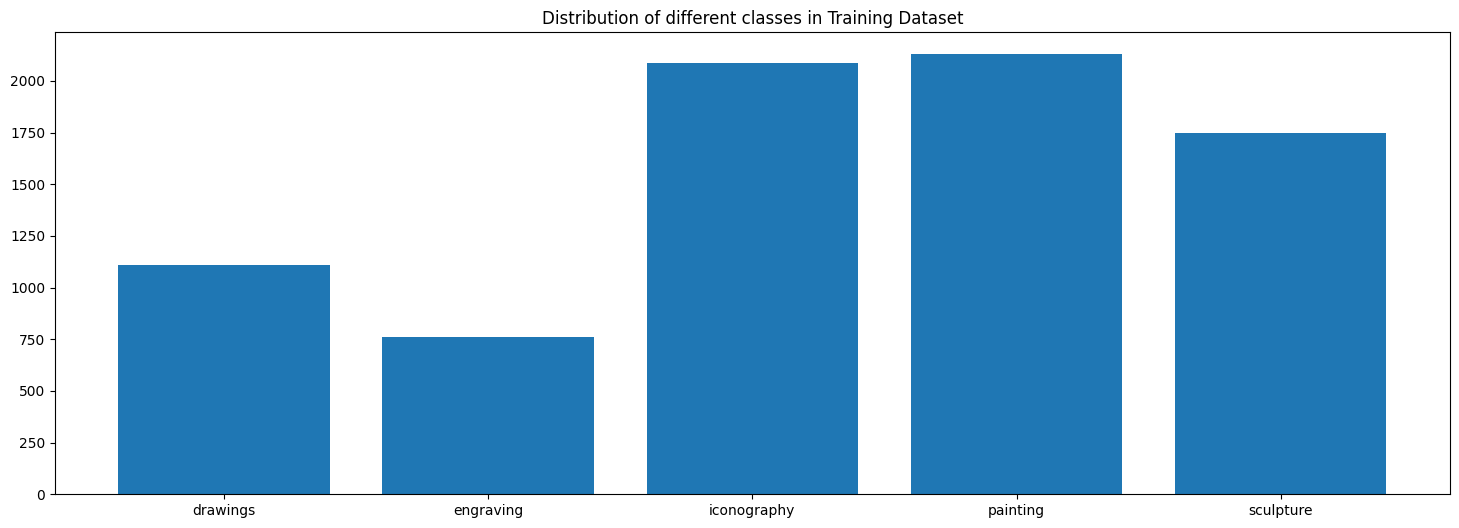




Training drawings images are: 1108
Training engraving images are: 761
Training iconography images are: 2087
Training painting images are: 2129
Training sculpture images are: 1746


In [4]:
#Looking at data in training part
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/dataset/dataset_updated/training_set/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/dataset/dataset_updated/training_set/'+i+'/'))))

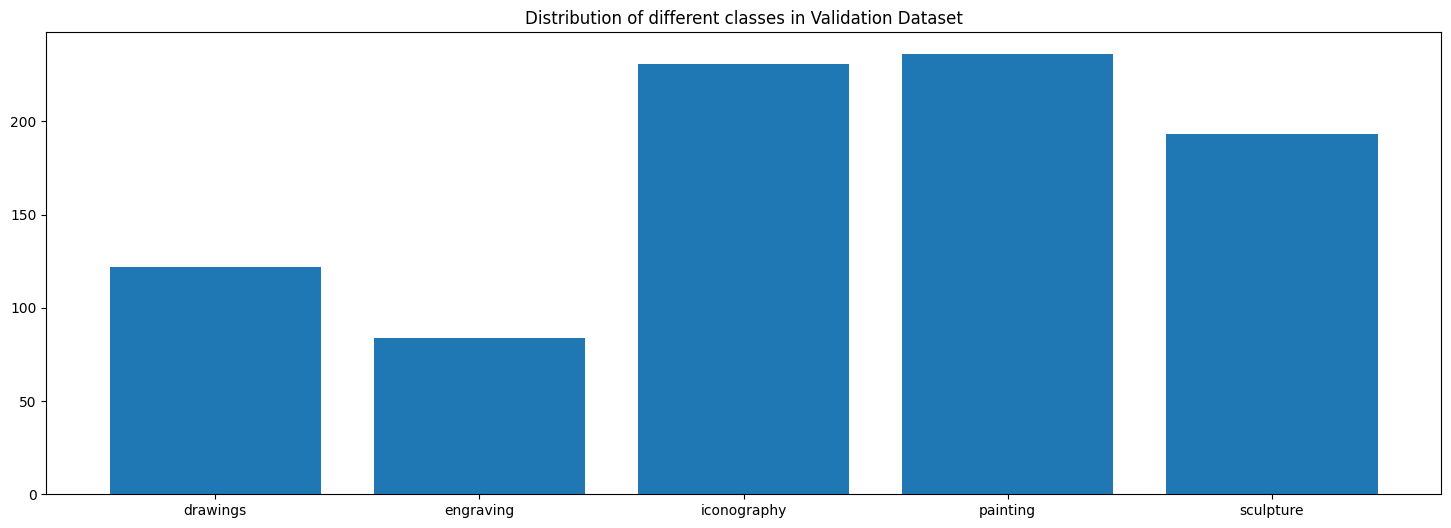




Testing drawings images are: 122
Testing engraving images are: 84
Testing iconography images are: 231
Testing painting images are: 236
Testing sculpture images are: 193


In [5]:
#Looking data in validation part
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/dataset/dataset_updated/validation_set/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(18, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()
print("\n\n")
#print no of images in each category
for i in image_folder:
    print('Testing {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/dataset/dataset_updated/validation_set/'+i+'/'))))

Removing dodgy images

In [19]:
import cv2
import imghdr

In [20]:
data_dir = '/content/drive/MyDrive/dataset/OG_dataset/'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

TRAINING DNN


In [34]:
#import deep learning based modules
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import PIL

In [7]:
#Check if gpu is allocated
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

In [8]:
#Limit gpu usage to reasonable level and avoid OOM errors

# List available physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth for each GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
#Setting image height and width and batch size
img_width=256; img_height=256
batch_size=64

In [24]:
#avoiding image loading error by skipping incorrect images
def image_generator(train_data_dir, batch_size):
    while True:
        image_paths = [os.path.join(train_data_dir, filename) for filename in os.listdir(train_data_dir)]
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_labels = []
            for image_path in image_paths[i:i+batch_size]:
                try:
                    img = Image.open(image_path)
                    img = img.resize((150, 150))  # Resize if needed
                    img = img.convert('RGB')  # Ensure it's in RGB format
                    img = np.array(img)
                    batch_images.append(img)
                    # Add your label handling code here
                    # batch_labels.append(...)
                except (PIL.UnidentifiedImageError, OSError):
                    print(f"Skipped {image_path} due to UnidentifiedImageError or OSError")
            if len(batch_images) > 0:
                yield np.array(batch_images), np.array(batch_labels)


In [25]:
#either run this block or next do not run both
TRAINING_DIR = '/content/drive/MyDrive/dataset/dataset_updated/training_set/'

train_generator = image_generator(TRAINING_DIR, batch_size)


In [23]:
#set training directory path and create a pipeline as datagen
TRAINING_DIR = '/content/drive/MyDrive/dataset/dataset_updated/training_set/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width)
                                                    )

Found 7826 images belonging to 5 classes.


In [28]:
#avoiding loading image error
def validation_image_generator(validation_data_dir, batch_size):
    while True:
        image_paths = [os.path.join(validation_data_dir, filename) for filename in os.listdir(validation_data_dir)]
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_labels = []
            for image_path in image_paths[i:i+batch_size]:
                try:
                    img = Image.open(image_path)
                    img = img.resize((150, 150))  # Resize if needed
                    img = img.convert('RGB')  # Ensure it's in RGB format
                    img = np.array(img)
                    batch_images.append(img)
                    # Add your label handling code here
                    # batch_labels.append(...)
                except (PIL.UnidentifiedImageError, OSError):
                    print(f"Skipped {image_path} due to UnidentifiedImageError or OSError")
            if len(batch_images) > 0:
                yield np.array(batch_images), np.array(batch_labels)


In [29]:
#run this block or next block do not run both
VALIDATION_DIR = '/content/drive/MyDrive/dataset/dataset_updated/validation_set/'

validation_generator = validation_image_generator(VALIDATION_DIR, batch_size)


In [11]:
#Set validation directory path and pipeline
VALIDATION_DIR = '/content/drive/MyDrive/dataset/dataset_updated/validation_set/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 866 images belonging to 5 classes.


In [30]:
#Preventing overfitting using Earlystopping and saving best model using ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model in location :
best_model_file = '/content/drive/MyDrive/dataset/dataset_updated/Best_Models/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [31]:
#********************Convulation Neural Network Training starts here********************
#CNN structure NOTE:last dense layer value must match number of classes,ie=13
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 58, 58, 64)       

In [32]:
#Compiling model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [35]:
#This part is actually training of model and takes long time consider before running
#here we start with moderate epoch of 50 or 100
history = model.fit(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [early_stopping,best_model]
                              )
model.save('Mini_art_classifier.h5')

StopIteration: ignored